In [1]:
import os
import glob
from collections import defaultdict

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import watchcbb.utils as utils
import watchcbb.efficiency as eff

In [2]:
dfs = []
for fname in glob.glob("../data/game_data/*.csv"):
    dfs.append(pd.read_csv(fname))
df = pd.concat(dfs)
df.Date = pd.to_datetime(df.Date)
df = df.sort_values("Date").reset_index(drop=True)
# df = df.query("Season==2020").reset_index(drop=True)
df["poss"] = 0.5*(df["WFGA"] + 0.44*df["WFTA"] - df["WOR"] + df["WTO"] + df["LFGA"] + 0.44*df["LFTA"] - df["LOR"] + df["LTO"])
print("Shape:",df.shape)
df.head(10)

Shape: (54760, 36)


,Season,Date,Type,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,poss
0,2011,2010-11-08,RG,illinois,79,california-irvine,65,H,0,29,...,14,22,11,26,12,14,7,1,21,74.90
1,2011,2010-11-08,RG,pittsburgh,83,rhode-island,75,H,0,29,...,13,16,9,20,16,16,7,6,25,75.62
2,2011,2010-11-08,RG,maryland,105,seattle,76,H,0,35,...,17,22,13,16,11,27,18,1,31,98.36
3,2011,2010-11-08,RG,texas,83,navy,52,H,0,30,...,10,18,5,21,8,16,5,5,24,80.44
4,2011,2010-11-10,RG,maryland,75,college-of-charleston,74,H,0,34,...,16,19,10,25,12,22,8,8,19,77.64
5,2011,2010-11-10,RG,pittsburgh,97,illinois-chicago,54,H,0,37,...,7,9,5,15,9,11,0,3,18,67.88
6,2011,2010-11-10,RG,illinois,84,toledo,45,H,0,37,...,10,19,3,16,9,23,6,0,14,72.00
7,2011,2010-11-10,RG,texas,89,louisiana-tech,58,H,0,34,...,13,20,13,25,4,22,6,5,21,83.74
8,2011,2010-11-12,RG,tulane,91,maryland-eastern-shore,62,A,0,30,...,19,26,9,16,11,21,4,2,28,78.04
9,2011,2010-11-12,RG,marquette,97,prairie-view,58,H,0,36,...,7,11,3,13,12,20,11,3,27,79.12


In [3]:
first, second = utils.partition_games(df, frac=0.7)
print(df.iloc[first].shape[0], df.iloc[second].shape[0])

38328 16432


In [4]:
season_stats_dict = utils.compute_season_stats(df.iloc[first])
season_stats_df = utils.stats_dict_to_df(season_stats_dict)
utils.add_advanced_stats(season_stats_df)
season_stats_dict = utils.stats_df_to_dict(season_stats_df)
print(season_stats_df.shape)
season_stats_df.head()

(3497, 54)


,year,team_id,wins,losses,totOT,TScore,TFGM,TFGA,TFGM3,TFGA3,...,Torbp,Tftr,Oposs,Oeff,Oastr,Otovr,Oefgp,Oorbp,Oftr,rawpace
0,2011,air-force,12,8,2,1328,463,941,133,333,...,0.196078,0.414453,1261.96,101.825731,0.157057,0.169381,0.485780,0.338073,0.283486,61.890370
1,2011,akron,12,10,2,1498,527,1263,175,508,...,0.262003,0.306413,1522.28,96.434296,0.137450,0.190418,0.480897,0.315789,0.383721,68.349663
2,2011,alabama,15,7,1,1493,566,1249,96,311,...,0.356601,0.293034,1502.48,83.595123,0.110456,0.199252,0.409393,0.300525,0.346633,67.763164
3,2011,alabama-am,6,10,0,959,348,896,62,237,...,0.282004,0.377232,1143.32,90.875695,0.136156,0.209393,0.472254,0.323194,0.399773,71.501250
4,2011,alabama-birmingham,16,6,5,1537,547,1224,166,480,...,0.312789,0.307190,1472.84,94.375492,0.130914,0.164221,0.457404,0.308123,0.287420,64.801768


In [5]:
eff.compute_efficiency_ratings(season_stats_dict)
season_stats_df = utils.stats_dict_to_df(season_stats_dict)

In [6]:
season_stats_df[["year","team_id","Tneteff","Tcorroeff","Tcorrdeff","rawpace","pace"]]\
    .query('year==2018')\
    .sort_values('Tneteff', ascending=False).reset_index(drop=True).head(25)

,year,team_id,Tneteff,Tcorroeff,Tcorrdeff,rawpace,pace
0,2018,villanova,37.704624,129.875622,92.170999,71.399091,70.655607
1,2018,purdue,34.744862,123.527746,88.782883,70.041791,70.441197
2,2018,virginia,33.937097,114.337084,80.399987,62.175652,61.678752
3,2018,duke,33.138386,126.930286,93.791900,73.603459,74.109624
4,2018,michigan-state,32.956865,121.238851,88.281986,70.227264,69.254485
5,2018,kansas,29.035391,121.047887,92.012496,72.153913,71.691346
6,2018,cincinnati,27.955425,111.624540,83.669115,68.833636,68.384579
7,2018,texas-tech,26.202681,112.618354,86.415673,69.811613,68.835404
8,2018,tennessee,26.156499,115.798850,89.642351,68.925843,68.868866
9,2018,xavier,24.345483,120.257686,95.912202,72.955855,72.412131


In [290]:
ADVSTATS = ['eff','astr','orbp','tovr','efgp','ftr']
def compile_training_data(df_remain, season_stats_dict, random_seed=0):
    np.random.seed(random_seed)
    data = defaultdict(list)
    for irow, row in df_remain.iterrows():
        d = season_stats_dict[row.Season]
        dowin = np.random.randint(2)
        mult = (1 if dowin else -1)
        id1, id2 = row.WTeamID, row.LTeamID
        if not dowin:
            id1, id2 = id2, id1
        data['result'].append(dowin)
        data['margin'].append((row.WScore-row.LScore)*mult)
        data['totscore'].append(row.WScore+row.LScore)
        data['date'].append(row.Date)
        data['season'].append(row.Season)
        data['tid1'].append(id1)
        data['tid2'].append(id2)
        data['poss'].append(row.poss / (1.0 + 0.125*row.NumOT))
        data['pace1'].append(d[id1]['pace'])
        data['pace2'].append(d[id2]['pace'])
        data['HA'].append(('ANH'.find(row.WLoc)-1) * mult)
        data['effdiff'].append(d[id1]["Tneteff"] - d[id2]["Tneteff"])
        data['effsum'].append(d[id1]["Tcorroeff"] + d[id1]["Tcorrdeff"] + d[id2]["Tcorroeff"] + d[id2]["Tcorrdeff"])
        data['raweffdiff'].append((d[id1]["Teff"] - d[id1]["Oeff"]) - \
                                   (d[id2]["Teff"] - d[id2]["Oeff"]))
        for stat in ADVSTATS:
            data['T'+stat].append(d[id1]['Tcorro'+stat] - d[id2]['Tcorro'+stat])
            data['O'+stat].append(d[id1]['Tcorrd'+stat] - d[id2]['Tcorrd'+stat])
#             data['T'+stat].append(d[id1]['T'+stat] - d[id2]['T'+stat])
#             data['O'+stat].append(d[id1]['O'+stat] - d[id2]['O'+stat])
         
    columns = ['season', 'date','tid1','tid2','result','totscore', 'margin', 
               'HA','poss','pace1','pace2','effdiff','raweffdiff','effsum']
    columns += list(set(data.keys()) - set(columns))
    return pd.DataFrame(data, columns=columns)

In [291]:
data = compile_training_data(df.iloc[second], season_stats_dict, random_seed=1)
print(data.shape)
data.query("tid1=='purdue' | tid2=='purdue'").sample(frac=1, random_state=1).head(10)

(16432, 26)


,season,date,tid1,tid2,result,totscore,margin,HA,poss,pace1,...,Tefgp,Oastr,Oftr,Torbp,Tastr,Otovr,Oeff,Oorbp,Oefgp,Teff
10692,2017,2017-02-25,purdue,michigan,0,152,-12,-1,64.68,71.452744,...,0.019865,0.008013,-0.056239,0.056245,0.035118,-0.026247,-9.570001,-0.048833,-0.060768,0.180004
5532,2014,2014-02-23,nebraska,purdue,1,133,19,1,71.82,67.236594,...,0.032322,-0.002743,0.054069,-0.105181,-0.018887,0.007570,0.876905,-0.043847,0.027760,2.232555
9669,2016,2016-03-12,michigan,purdue,0,135,-17,0,69.60,66.376917,...,0.050068,0.013620,-0.022938,-0.094658,-0.007039,0.030469,10.919124,0.052403,0.072586,5.834267
12278,2018,2018-02-22,illinois,purdue,0,179,-7,1,69.02,73.022724,...,-0.089788,-0.000115,0.215292,0.067415,-0.052952,0.049848,7.746202,0.008262,0.061853,-15.700152
6167,2014,2014-03-09,northwestern,purdue,1,139,9,-1,68.54,63.739988,...,-0.006669,0.008233,-0.002722,-0.165682,0.002910,-0.018680,-4.616429,-0.035408,-0.026544,-8.603620
9200,2016,2016-03-01,purdue,nebraska,1,143,19,-1,65.04,71.056794,...,0.020779,-0.003474,-0.128684,0.033286,0.052912,-0.031991,-12.477338,-0.062344,-0.062140,4.407504
9027,2016,2016-02-27,purdue,maryland,1,162,4,1,67.36,71.056794,...,-0.042579,0.012892,0.006785,0.035513,0.022277,-0.002985,-5.093022,-0.060298,-0.018857,-3.183789
13585,2019,2019-02-19,indiana,purdue,0,94,-2,1,64.44,69.501506,...,-0.026265,0.000954,-0.044120,-0.104259,-0.014661,-0.024639,-3.561095,0.011251,-0.023140,-14.423469
4752,2013,2013-03-20,purdue,western-illinois,1,148,14,1,62.50,67.940167,...,-0.008216,-0.005153,0.006509,0.141213,0.008413,-0.003987,-0.198411,-0.023393,-0.024026,1.673499
9651,2016,2016-03-11,purdue,illinois,1,147,31,0,66.22,71.056794,...,0.026129,-0.017714,0.014907,0.152116,0.034749,-0.031069,-15.249778,-0.076218,-0.098564,6.953572


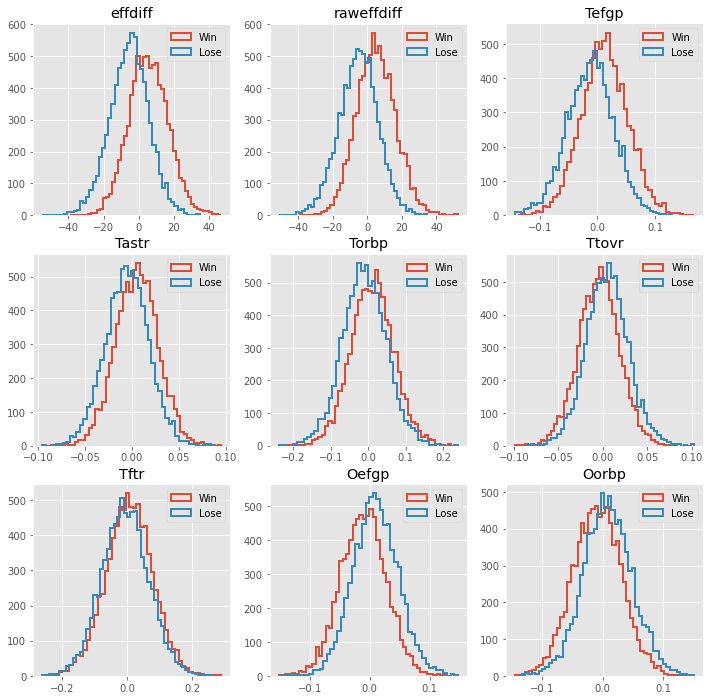

In [85]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
axs = axs.flatten()
toplot = ['effdiff','raweffdiff','Tefgp',
          'Tastr','Torbp', 'Ttovr', 
          'Tftr','Oefgp','Oorbp'
         ]
for name,ax in zip(toplot,axs):
    ax.hist(data.loc[ data.result.astype(bool)][name], bins=50, histtype='step', lw=2, label='Win')
    ax.hist(data.loc[~data.result.astype(bool)][name], bins=50, histtype='step', lw=2, label='Lose')
    ax.set_title(name)
    ax.legend()

array([0.28962647, 0.19656888, 0.10634058, 0.09546363, 0.08296222,
       0.06286618, 0.06204601, 0.05225246, 0.03056009, 0.0186644 ,
       0.00153919, 0.0011099 ])

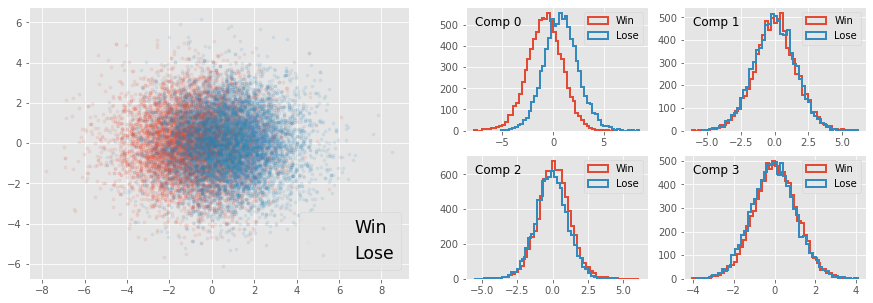

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])
ADVSTATFEATURES = ["T"+stat for stat in ADVSTATS] + ["O"+stat for stat in ADVSTATS]
xf = pca.fit_transform(data[ADVSTATFEATURES])
plt.figure(figsize=(15,5))
mask = data.result.astype(bool)
plt.subplot(1,2,1)
plt.scatter(xf[mask,0], xf[mask,1], s=10, alpha=0.1, label="Win")
plt.scatter(xf[~mask,0], xf[~mask,1], s=10, alpha=0.1, label="Lose")
plt.legend(fontsize='xx-large')
for i,subplot in zip([0,1,2,3],[3,4,7,8]):
    plt.subplot(2,4,subplot)
    plt.hist(xf[mask,i], bins=50, histtype='step', lw=2, label='Win')
    plt.hist(xf[~mask,i], bins=50, histtype='step', lw=2, label='Lose')
#     plt.title('Comp '+str(i))
    plt.text(0.05,0.85,'Comp '+str(i), transform=plt.gca().transAxes, fontsize='large')
    plt.legend()
pca.named_steps['pca'].components_[0,:]
pca.named_steps['pca'].explained_variance_ratio_

effdiff   : 0.5724
raweffdiff: 0.5641
advstats  : 0.5734
advstats_xgb: 0.5700


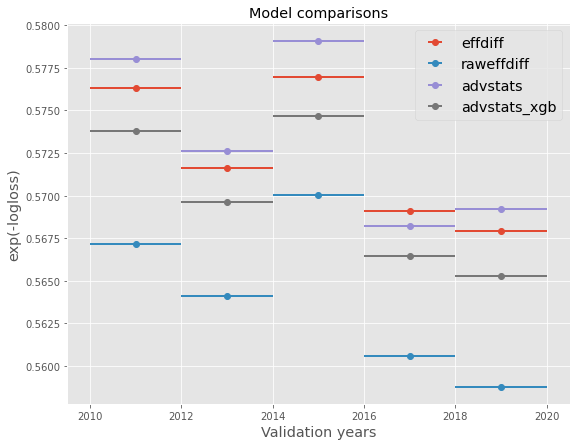

In [173]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

def train_test_split_by_year(data, train_years, test_years, do_pca=True):
    data_train = data.loc[data.season.isin(train_years)].copy()
    data_test = data.loc[data.season.isin(test_years)].copy()
    
    if do_pca:
        xf_train = pca.fit_transform(data_train[ADVSTATFEATURES])
        xf_test = pca.transform(data_test[ADVSTATFEATURES])
        for i in range(len(ADVSTATS)*2):
            data_train["PCA"+str(i)] = xf_train[:,i]
            data_test["PCA"+str(i)] = xf_test[:,i]
    
    return data_train, data_test
    
logreg = LogisticRegression(C=1.0)
xgbcls = XGBClassifier(max_depth=2, n_estimators=50)

PCAFEATURES = ["PCA"+str(i) for i in range(len(ADVSTATS)*2)]
models = {
#     "HA" : [],
    "effdiff" : ["effdiff"],
    "raweffdiff" : ["raweffdiff"],
#     "bad" : ["Otovr"],
    "advstats" : PCAFEATURES,
    "advstats_xgb" : PCAFEATURES
}

model_scores = defaultdict(list)
model_coeffs = defaultdict(list)
years = data.season.unique()
NVALID = 2
start_years = years[:len(years)-NVALID+1:NVALID]
for start_valid in start_years:
    valid_years = list(range(start_valid, start_valid+NVALID))
    train_years = sorted(set(years)-set(valid_years))
    
    data_train, data_valid = train_test_split_by_year(data, train_years, valid_years)
    
    for name,features in models.items():
        X_train = data_train[features+['HA']]
        y_train = data_train.result
        X_valid = data_valid[features+['HA']]
        y_valid = data_valid.result
        
        if "xgb" not in name:
            logreg.fit(X_train, y_train)
            probs = logreg.predict_proba(X_valid)
            score = log_loss(y_valid, probs)
            model_scores[name].append(np.exp(-score))
            model_coeffs[name].append(logreg.coef_[0,:])
        else:
            xgbcls.fit(X_train, y_train)
            probs = xgbcls.predict_proba(X_valid)
            score = log_loss(y_valid, probs)
            model_scores[name].append(np.exp(-score))

plt.figure(figsize=(9,7))
xs = start_years
for name,scores in model_scores.items():
    print(f'{name:10s}: {np.mean(scores):.4f}')
    plt.errorbar(xs, scores, xerr=1, fmt='o', lw=2, label=name)
plt.xlabel('Validation years', fontsize='x-large')
plt.ylabel('exp(-logloss)', fontsize='x-large')
plt.title('Model comparisons')
plt.legend(fontsize='x-large');

# model_coeffs['advstats']

In [150]:
data_train, data_valid = train_test_split_by_year(data, list(range(2011,2018)), [2018,2019,2020])

best = (0,0,0)
for i in [2,3,4]:
    for j in [10,20,50,100]:
        xgbcls = XGBClassifier(max_depth=i, n_estimators=j)
        xgbcls.fit(X_train, y_train)
        probs = xgbcls.predict_proba(X_valid)
        score = np.exp(-log_loss(y_valid, probs))
        if score > best[2]:
            best = (i,j,score)
print('(max_depth, n_estimatores, best_score)',best)

(max_depth, n_estimatores, best_score) (2, 50, 0.5652763767010642)


In [314]:
probs = []
for year in data.season.unique():
    train_years = data.season.unique().tolist()
    train_years.remove(year)
    data_train, data_valid = train_test_split_by_year(data, train_years, [year])
    X_train = data_train[PCAFEATURES+['HA']]
    y_train = data_train.result
    X_valid = data_valid[PCAFEATURES+['HA']]
    
    logreg.fit(X_train, y_train)
    probs += logreg.predict_proba(X_valid)[:,1].tolist()

data["predicted_prob"] = probs
data[['result','predicted_prob']].head(5)

,result,predicted_prob
0,1,0.697877
1,1,0.783754
2,0,0.285629
3,0,0.284206
4,1,0.620873


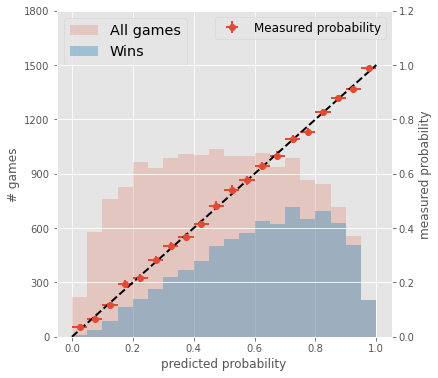

In [219]:
binedges = np.linspace(0,1,21)
ws = []
errs = []
for i in range(len(binedges)-1):
    num = ((data.predicted_prob > binedges[i]) & (data.predicted_prob < binedges[i+1]) & data.result).sum()
    den = ((data.predicted_prob > binedges[i]) & (data.predicted_prob < binedges[i+1])).sum()
    f = num/den
    ws.append(f)
    errs.append(np.sqrt(f*(1-f)/den))
fig, ax1 = plt.subplots(figsize=(6,6))
plt.hist(data.predicted_prob, bins=binedges, histtype='stepfilled', lw=2, alpha=0.2, label='All games')
plt.hist(data.predicted_prob[data.result.astype(bool)], bins=binedges, histtype='stepfilled', lw=2, alpha=0.4, label='Wins')
plt.xlabel('predicted probability')
plt.ylabel('# games')
plt.gca().set_ylim(0,1800)
plt.yticks([0,300,600,900,1200,1500,1800])
plt.legend(loc='upper left', fontsize='x-large')
ax2 = ax1.twinx()
plt.plot([0,1],[0,1],'k--',lw=2)
plt.errorbar(0.5*(binedges[:-1]+binedges[1:]), ws, yerr=errs, xerr=0.5*(binedges[1]-binedges[0]), 
            fmt = 'o', lw=2, label='Measured probability')
plt.xlabel('predicted probability')
plt.ylabel('measured probability')
plt.gca().set_ylim(0,1.2)
plt.legend(fontsize='large')

Regression for pace
[0.01469658] -1.781365610500444
0.3041607405738831
Regression for total score
[0.00475375] 9.755760752346731
0.2245575159324812
Regression for score margin
[0.01086384 4.33681052] -0.07467214922583734
0.31105638836445626


Text(0, 0.5, 'Predicted win probability')

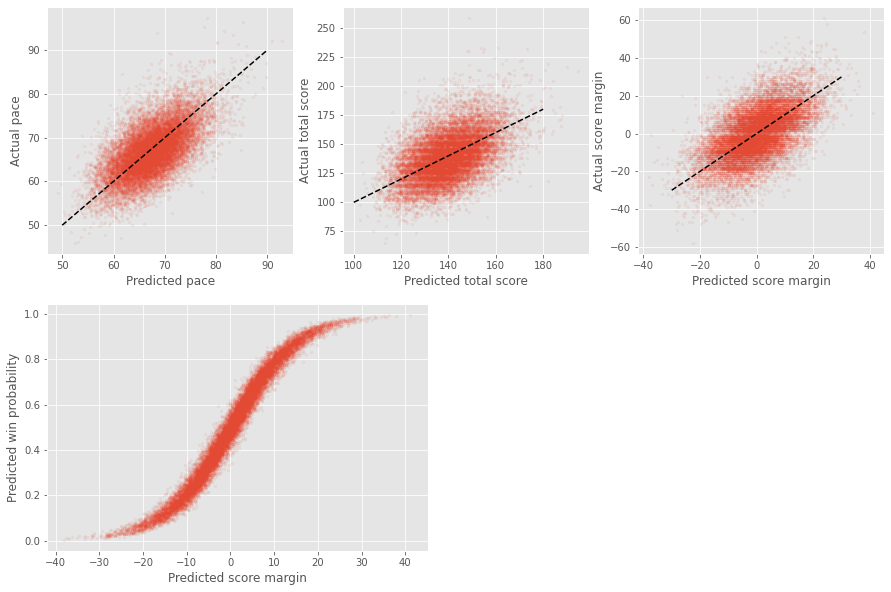

In [336]:
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

linreg = LinearRegression(fit_intercept=True)

p1 = data.pace1.values
p2 = data.pace2.values
ed = data.effdiff.values
es = data.effsum.values
act_pace = data.poss.values
act_totscore = data.totscore.values
act_margin = data.margin.values

def get_weights(vals):
    # weight pace regression
    mu = vals.mean()
    std = vals.std()
    return 1/np.maximum(0.01,norm.pdf(vals, loc=mu, scale=std))

print("Regression for pace")
X = np.array([p1*p2]).T
linreg.fit(X, act_pace, get_weights(act_pace))
pred_pace = linreg.predict(X)
data["predicted_pace"] = pred_pace
print(linreg.coef_, linreg.intercept_)
print(linreg.score(X, act_pace))

print("Regression for total score")
X = np.array([pred_pace*es]).T
linreg.fit(X, act_totscore, get_weights(act_totscore))
pred_score = linreg.predict(X)
data["predicted_totscore"] = pred_score
print(linreg.coef_, linreg.intercept_)
print(linreg.score(X, act_totscore))

print("Regression for score margin")
X = np.array([pred_pace*ed, data.HA]).T
linreg.fit(X, act_margin, get_weights(act_margin))
pred_margin = linreg.predict(X)
data["predicted_margin"] = pred_margin
print(linreg.coef_, linreg.intercept_)
print(linreg.score(X, act_margin))

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.scatter(data.predicted_pace, data.poss, s=7, alpha=0.07)
plt.plot([50,90],[50,90],'k--')
plt.xlabel('Predicted pace')
plt.ylabel('Actual pace')
plt.subplot(2,3,2)
plt.scatter(data.predicted_totscore, data.totscore, s=7, alpha=0.07)
plt.plot([100,180],[100,180],'k--')
plt.xlabel('Predicted total score')
plt.ylabel('Actual total score')
plt.subplot(2,3,3)
plt.scatter(data.predicted_margin, data.margin, s=7, alpha=0.07)
plt.plot([-30,30],[-30,30],'k--')
plt.xlabel('Predicted score margin')
plt.ylabel('Actual score margin')
plt.subplot(2,2,3)
plt.scatter(data.predicted_margin, data.predicted_prob, s=7, alpha=0.07)
plt.xlabel("Predicted score margin")
plt.ylabel("Predicted win probability")